In [22]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, ConfusionMatrixDisplay

from sys import platform
if platform == "linux" or platform == "linux2":
    # linux
    path='/home/vedant/projects/'
elif platform == "darwin":
    # OS X
    path='/Users/vedant/Desktop/Programming/'

In [31]:
X_train=np.load(f'{path}ScreamDetection/resources/working_data/x_train.npy',allow_pickle = True)
y_train=np.argmax(np.load(f'{path}ScreamDetection/resources/working_data/y_train_hot.npy',allow_pickle = True),axis=1)

X_test=np.load(f'{path}ScreamDetection/resources/working_data/x_test.npy',allow_pickle = True)
y_test=np.argmax(np.load(f'{path}ScreamDetection/resources/working_data/y_test_hot.npy',allow_pickle = True),axis=1)

X_valid=np.load(f'{path}ScreamDetection/resources/working_data/x_valid.npy',allow_pickle = True)
y_valid=np.argmax(np.load(f'{path}ScreamDetection/resources/working_data/y_valid_hot.npy',allow_pickle = True),axis=1)

## SVM Results for 3 classes with test set accuracy

Overall Accuracy Score: 0.8339622641509434
Class-wise accuracy:
[0.90839695 0.07633588 0.01526718]
[0.20775623 0.7534626  0.03878116]
[0.05280528 0.04950495 0.89768977]
Macro Accuracy: 0.8089786756453424
Confusion Matrix:


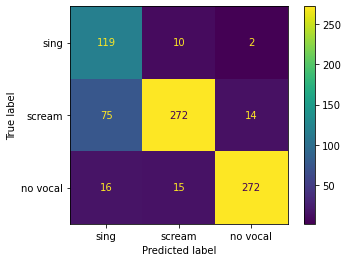

In [32]:
SVM_model = SVC(gamma='auto',C=1.0, kernel='rbf', degree=3,random_state=None)
SVM_model.fit(X_train, y_train)
SVM_prediction = SVM_model.predict(X_test)

cm=confusion_matrix(y_test,SVM_prediction)
score=precision_score(y_test,SVM_prediction, average='macro')
acc = accuracy_score(y_test,SVM_prediction)


print(f"Overall Accuracy Score: {acc}")
print("Class-wise accuracy:")
for row in cm:
    print(row/row.sum())
print(f"Macro Accuracy: {score}")

print("Confusion Matrix:")
# print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['sing','scream','no vocal']).plot()
